<a href="https://colab.research.google.com/github/Hrishik-D/CapstoneProject_EDA_Hotel_Analysis/blob/main/EDA_Hotel_Analysis_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member -** Hrishik Debnath

# **Project Summary -**

Data analysis of hotel bookings is a crucial process that involves examining and extracting valuable insights from various datasets related to hotel reservations. This analysis is performed to optimize hotel operations, improve customer satisfaction, and enhance revenue management.



# **GitHub Link -**

https://github.com/Hrishik-D/CapstoneProject_EDA_Hotel_Analysis/blob/main/EDA_Hotel_Analysis_Individual.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Numerical Programming/Capstone Project/Hotel Bookings.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows, columns = df.shape
print(f'The dataframe has {rows} rows and {columns} columns')

The dataframe has 119390 rows and 32 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
#Creating copy
df1=df.copy()

In [8]:
df1[df1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

We try to understand the meaning of the data by looking for unique values

In [9]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f'Total duplicate rows: {duplicate_count}')

Total duplicate rows: 31994


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print("The number of missing value in given column ")
print('*'*75)
df.isnull().sum().sort_values(ascending = False)[:7]

The number of missing value in given column 
***************************************************************************


company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
dtype: int64

### What did you know about your dataset?

We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
Also, 488 null values found in country column.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

There are 32 columns in the dataframe.
This dataset contains booking information for a city hotel and a resort hotel. It contains the following features.

```
- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record.
- meal: Type of meal chosen
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for
                     Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed
- reservation_status_date: Date of making reservation status.
```

- Total number of rows in data: 119390
- Total number of columns: 32

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in df1.describe(include = 'all').columns:
  print(col)
  print(df[col].unique())
  print('*'*75)

hotel
['Resort Hotel' 'City Hotel']
***************************************************************************
is_canceled
[0 1]
***************************************************************************
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 3

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [15]:
#shape of dataframe after dropping duplicates
df1.shape

(87396, 32)

In [16]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)         #filling missing col of company and agent with zero

In [17]:
df1['country'].fillna("others", inplace = True)     #filling the NAN values of countries column with "others"

In [18]:
df1.isnull().sum().sort_values(ascending = False)[:3]

children                  4
hotel                     0
previous_cancellations    0
dtype: int64

In [19]:
df1['children'].fillna(df1['children'].mean, inplace = True)        #replacing null values of students with mean values

In [20]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:3] #checking for any column having null values

hotel                 0
is_canceled           0
reservation_status    0
dtype: int64

In [21]:
#type casting company abd agent columns to interger
df1[['company', 'agent']] = df1[['company', 'agent']].astype('int64')

In [22]:
# the to_numeric() function with the errors='coerce' parameter to convert the 'children' column to numeric values.
# The errors='coerce' option will replace non-numeric values with NaN.

df1['children'] = pd.to_numeric(df1['children'], errors='coerce')

In [23]:
df1['children'] = df1['children'].fillna(df1['children'].mean()).astype(int)     #filling NAN with mean children and converting into integer

In [24]:
#checking if all the rows are converted to desired data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

### Number rows where total no of people is zero

In [25]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape  #number rows where total no of people is zero

(166, 32)

In [26]:
 # dropping number rows where total no of people is zero
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index,inplace = True)

### Changing date column to datetime format

In [27]:
#changing to datetime format
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

### Adding important column


In [28]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [29]:
df1.shape

(87230, 34)

### What all manipulations have you done and insights you found?

Manipulation and insights :    
- removing duplicates, after removing duplicates 87396 rows and 32 columns.
- replacing Null values from company and agent with Zero(0), because company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
-filling the NAN values of countries column with "others"
-replacing null values of students with mean values
- changing the data type of the columns to desired data type.
- Checking if the sum of children, babies, adult is zero i.e total guest as zero. Therefore deleting such rows.
- Adding two new columns to the dataframe they are:
-- Total No of days of stays  = Stay at weekend + stay at weekdays
-- Total No of guest = No of adult + children + babies

After the data being cleaned it is ready for analysis

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

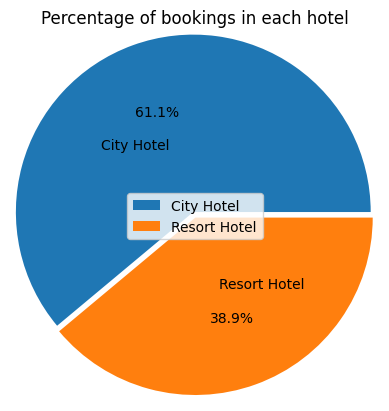

In [30]:
# Chart - 1 visualization code
#Percentage of bookings in each hotel
grouped_by_hotel = df1.groupby('hotel')
d1 = df1.groupby('hotel').size().reset_index().rename(columns = {0:'Booking %'})
plt.pie(d1['Booking %'], labels = d1['hotel'], autopct = '%0.1f%%', explode = [0.03,0.01], radius = 1.2, labeldistance = 0.4 )

plt.title("Percentage of bookings in each hotel")
plt.legend(loc = 'center')

plt.show()

##### 1. Why did you pick the specific chart?

Pie chart helps to visualize the percentage of booking across various hotel.

##### 2. What is/are the insight(s) found from the chart?

It is found that most people book city hotels rather than resort hotel. None the less resort hotel booking are 40% which is comparative with city hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

City hotel booking is 61% and resort hotel booking is 39%. Better services and recreation activities must be provided in resort hotels for attraction more customers while city hotels should continue providing better services to keep up the trend.

#### Chart - 2

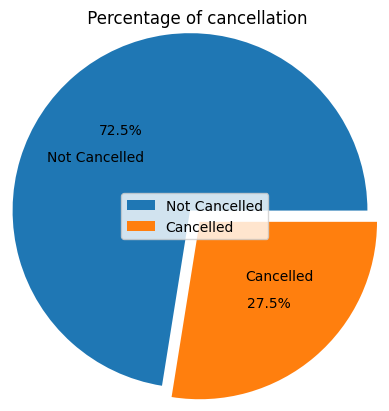

In [31]:
# Chart - 2 visualization code
#Percentage of cancellation
c2 = df1.is_canceled.value_counts().reset_index().rename(columns = {'index':'cancellation', 'is_canceled':'number'} )
c2['cancellation'] = ['Not Cancelled', 'Cancelled']

plt.pie(c2['number'], labels = c2['cancellation'], autopct = '%0.1f%%', explode = [0.05,0.05], radius = 1.2, labeldistance = 0.4 )
plt.title(" Percentage of cancellation")
plt.legend(loc = 'center')

plt.show()




##### 1. Why did you pick the specific chart?

Pie chart is better for showing percentage distribution.

##### 2. What is/are the insight(s) found from the chart?

The Cancelled Order is 27.5%


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding patterns in cancellations helps with demand forecasting. Hotels can better allocate resources, such as staff and inventory, based on historical cancellation data, reducing operational costs during periods of lower occupancy.
- By understanding why customers cancel their reservations, the hotel can adjust its pricing strategies, promotions, or policies to reduce cancellations.



#### Chart - 3

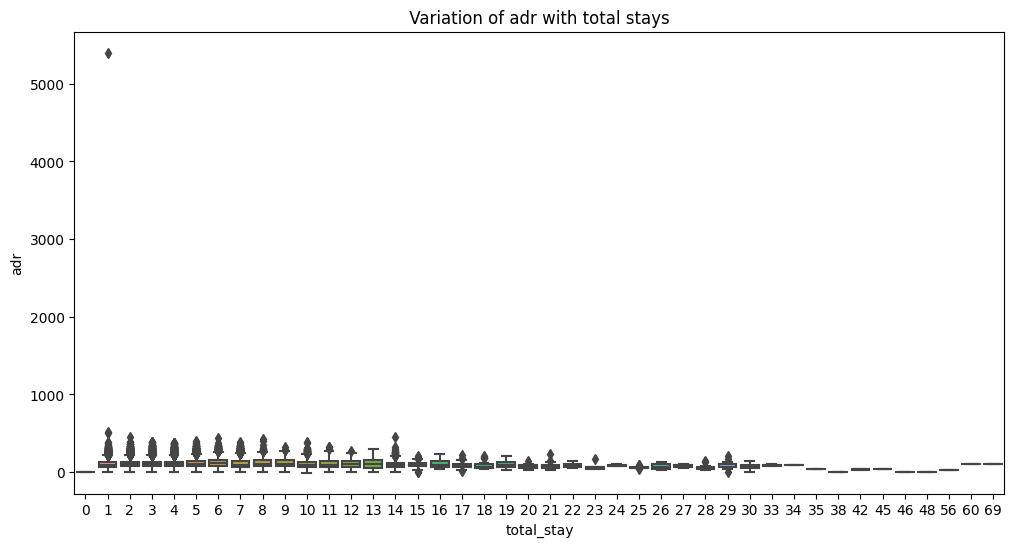

In [32]:
# Chart - 3 visualization code
# How adr varies with total stays and finding the outlier

plt.figure(figsize = (12,6))
sns.boxplot(y = 'adr', x = 'total_stay', data = df1)
plt.title(" Variation of adr with total stays ")
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

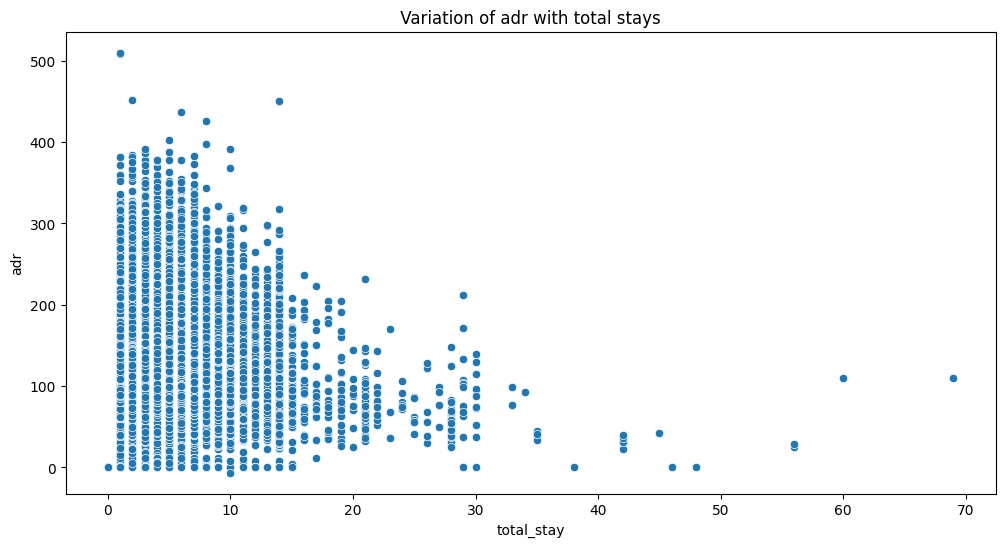

In [33]:
df1.drop(df1[df1['adr'] >= 5000].index, inplace = True)   #removing outlier
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.title(" Variation of adr with total stays ")
plt.show()

##### 1. Why did you pick the specific chart?

First I used boxplot to find the outlier in ADR then used scatterplot to find the relation between total stays and adr.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
- Increased Revenue from Longer Stays: While ADR may be lower for longer stays, the cumulative revenue from a longer booking can be substantial. Hotels can benefit from longer guest stays by offering competitive pricing that encourages guests to stay for an extended duration.

Negative Impact:
- Lower Short-Term Revenue: While longer stays may yield higher cumulative revenue, there may be a short-term decrease in ADR. This could lead to lower immediate revenue compared to shorter stays with higher ADR.

- Inventory Management: Longer stays tie up room inventory for an extended period. Hotels need to carefully manage their inventory to ensure that longer stays do not hinder their ability to accommodate shorter stays during peak demand periods.

#### Chart - 4

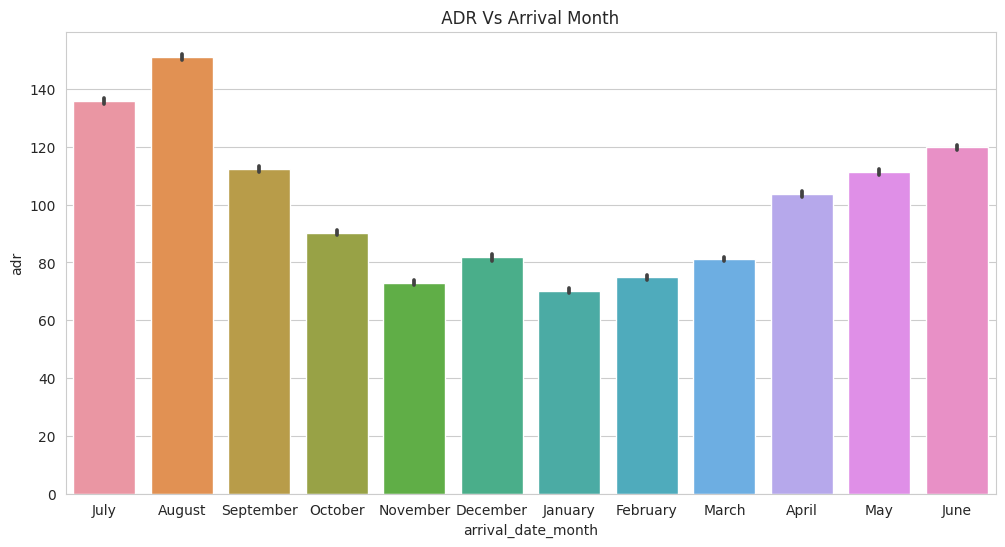

In [34]:
# how  ADR varies with Arrival Month
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
ax = sns.barplot(y = 'adr', x = 'arrival_date_month', data = df1) #barplot

plt.title(" ADR Vs Arrival Month ")
plt.show()

##### 1. Why did you pick the specific chart?


A barplot comparing Average Daily Rate (ADR) against different months can provide valuable insights into the seasonal pricing trends of a hotel.

##### 2. What is/are the insight(s) found from the chart?

It can be seen from the bar plot that the months APRIL, MAY, JUNE, JULY, AUGUST,SEPMTEMBER has higher ADR while months OCT, NOV, DEC, JAN, FEB, MARCH has ADR less than 100.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Barplot of ADR vs. Months, it can reveal several things:

- Seasonal Patterns: By looking at the barplot, we can identify whether there are clear seasonal patterns in ADR. For instance, we observe that ADR tends to be higher during peak tourist months (e.g., summer) and lower during off-peak months (e.g., winter).

- Demand Variations: ADR can be influenced by supply and demand. The barplot can show you which months have higher demand, leading to higher prices, and which months have lower demand, resulting in lower prices.

- Business Strategy: The plot can reveal whether the hotel employs revenue management strategies. For example, ADR may be intentionally lowered during the off-season to attract more guests, or it may be raised during peak season to maximize revenue.

- Revenue Potential: Understanding the monthly ADR can help estimate revenue potential for different periods of the year, aiding in budgeting and financial planning.


#### Chart - 5

<ipython-input-35-4e7d37260cfd>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c5.drop(d1[c5['agent'] == 0].index, inplace = True)   #deleting values where agent is 0


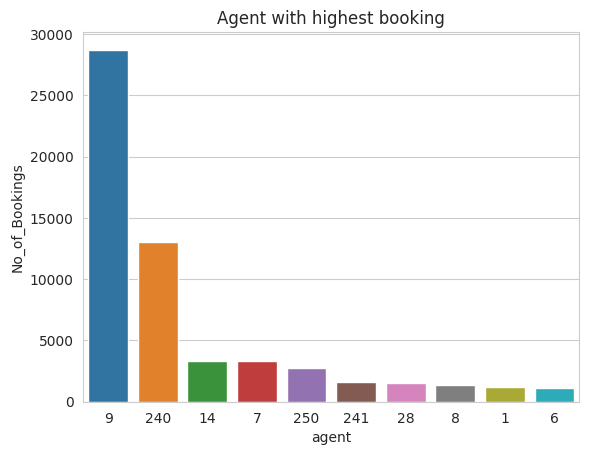

In [35]:
# Chart - 5 visualization code
#Agent with highest booking

c5 = df1.groupby('agent')

c5  = c5.size().reset_index().sort_values(by = 0, ascending = False)[:11] #taking the top 11
c5.rename(columns = {0: 'No_of_Bookings'}, inplace = True)  #renaming the column
c5.drop(d1[c5['agent'] == 0].index, inplace = True)   #deleting values where agent is 0

sns.barplot(x = 'agent', y = 'No_of_Bookings',data = c5, order = c5.sort_values('No_of_Bookings', ascending = False).agent)

plt.title("Agent with highest booking")
plt.show()


##### 1. Why did you pick the specific chart?

Barplot can easily compare different agents with booking number

##### 2. What is/are the insight(s) found from the chart?

The plot shows top 10 agents with no of bookings. It is seen that Agent No 9 and 10 makes most of the bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which agent makes the highest bookings in a hotel business can provide valuable insights and opportunities to improve and optimize various aspects of the business.
- Marketing and Collaboration: Identify the top-performing agent and establish a strong working relationship with them. Collaborate on marketing efforts, special promotions, and exclusive deals to attract more bookings through their channel.
- Pricing Strategy: Adjust your pricing strategy for the agent's bookings. If this agent consistently brings in a high volume of customers, consider offering them competitive rates or special discounts to maintain the relationship and encourage more bookings.
- Quality Control: Monitor the quality of service provided to guests booked through the top agent. Ensuring a positive guest experience will lead to repeat business and positive reviews.

#### Chart - 6

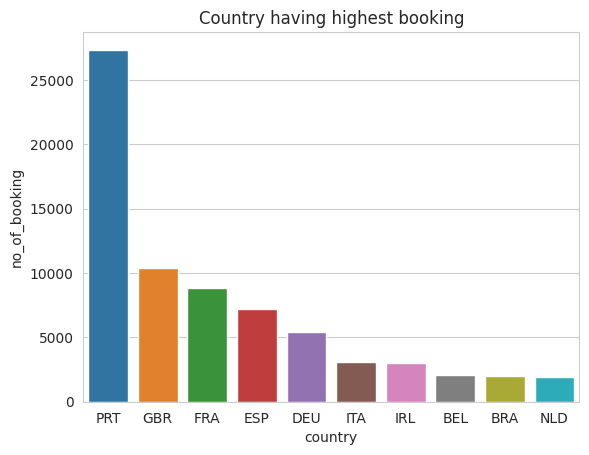

In [36]:
# Chart - 6 visualization code
# From which country most of the guests are coming ?

c6 = df1.groupby('country').size().reset_index().sort_values(by = 0, ascending = False).rename(columns = {0:'no_of_booking'})[:10] #grouping by and renaming col

sns.barplot(data = c6, x = 'country', y = 'no_of_booking' )
plt.title("Country having highest booking")
plt.show()


##### 1. Why did you pick the specific chart?

Barplot helps us easy visualization of no of booking from various country.

##### 2. What is/are the insight(s) found from the chart?

From the barplot we see that the country which has highest booking are:
- PRT: Portugal
- GBR: United Kingdom (Great Britain and Northern Ireland)
- FRA: France
- ESP: Spain
- DEU: Germany
- ITA: Italy
- IRL: Ireland
- BEL: Belgium
- BRA: Brazil
- NLD: Netherlands

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Top-Performing Countries: Identifying the countries with the highest number of bookings (e.g., Portugal, United Kingdom, France) can help the business focus its marketing and expansion efforts in those regions to further boost
bookings.
- Understanding where the majority of bookings come from allows the business to allocate resources efficiently, such as providing customer support in the most commonly booked languages.

#### Chart - 7

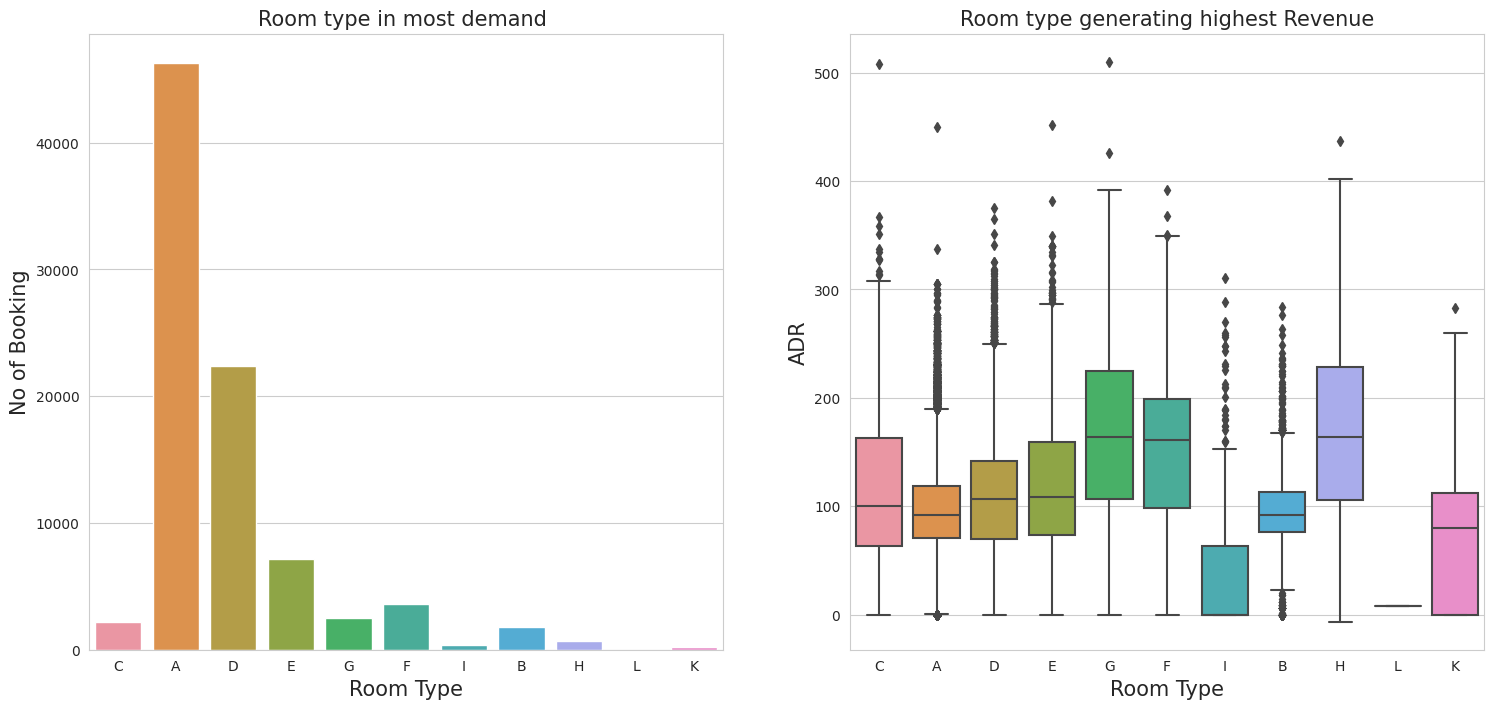

In [37]:
# Chart - 7 visualization code
#Room that is most in demand and generates highest revenue

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
# d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
axes[0].set_title("Room type in most demand ", fontsize = 15)
axes[0].set_xlabel("Room Type", fontsize = 15)
axes[0].set_ylabel("No of Booking", fontsize = 15)

sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
axes[1].set_title("Room type generating highest Revenue", fontsize = 15)
axes[1].set_xlabel("Room Type", fontsize = 15)
axes[1].set_ylabel("ADR", fontsize = 15)
plt.show()


##### 1. Why did you pick the specific chart?

Counts plot gives the no of booking in a particular room type while Boxplot gives the distributin of room type with adr.

##### 2. What is/are the insight(s) found from the chart?

Most demanded room type is A, but better adr rooms are of type H, G and F.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which room types generate a higher Average Daily Rate (ADR) can provide valuable insights into how to improve your hotel business. Here are some strategies we can consider:

- Pricing Strategy:If certain room types consistently generate a higher ADR, consider raising the prices for those room categories during peak seasons or high-demand periods.

- Promote High-ADR Rooms: Encourage guests to upgrade to higher-ADR room types during the booking process or at check-in. Offer incentives, such as discounts or complimentary amenities, to entice guests to choose these rooms.

- Enhanced Services:Personalized Service: Provide personalized and exceptional service to guests staying in high-ADR rooms.

- Maintenance and Upkeep: Ensure that high-ADR rooms are well-maintained and regularly updated to meet or exceed guest expectations.



#### Chart - 8

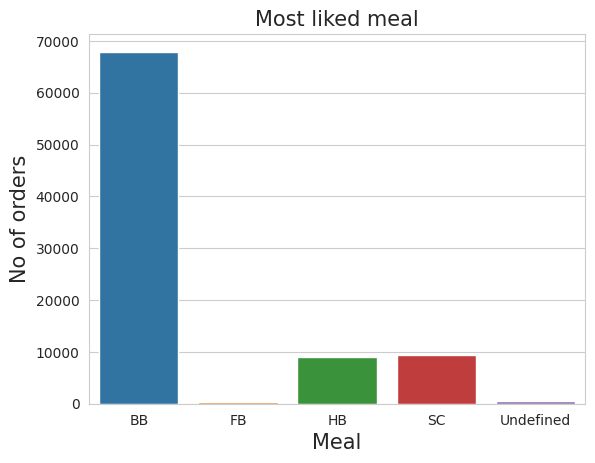

In [38]:
# Chart - 8 visualization code
#which is the most liked meal ?

sns.countplot(x = df1['meal'])

plt.title("Most liked meal", fontsize = 15)
plt.ylabel("No of orders", fontsize = 15)
plt.xlabel("Meal", fontsize = 15)
plt.show()

In [39]:
df1.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

##### 1. Why did you pick the specific chart?

Countplot gives the count of number of meal ordered from a specific type and compare with other type.

##### 2. What is/are the insight(s) found from the chart?

The most preffered and ordered meal is BB.

BB (Bed and Breakfast): This meal plan usually includes accommodations (the bed) and breakfast. Guests receive breakfast as part of their stay, often served in a designated dining area of the hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Impact the business and how it can be improved:
-
Attracting Guests: A popular BB option can attract more guests to your hotel since it offers a convenient and cost-effective way for travelers to start their day with breakfast included.

- Revenue Stability: BB packages provide a steady source of revenue, especially during weekdays and off-peak seasons when guests are less likely to dine at the hotel's restaurants for other meals.

- Customer Satisfaction: A well-executed BB plan can enhance guest satisfaction, as it simplifies their stay by offering a complimentary breakfast. Positive guest experiences can lead to repeat bookings and word-of-mouth referrals.

Negative Impacts:

- Potential for Lower Profit Margins: While BB plans attract guests, they may have lower profit margins compared to Full Board (FB) or Half Board (HB) plans, where additional meals are charged at higher rates.

- Demand Fluctuations: Relying heavily on BB may lead to demand fluctuations during breakfast hours, potentially overcrowding dining areas during peak times and underutilizing them during off-peak periods.



#### Chart - 9

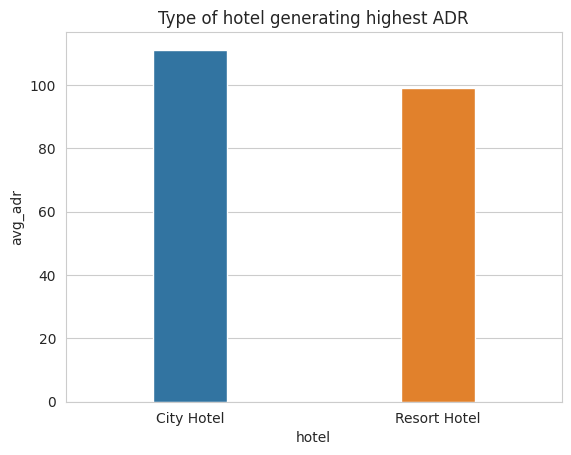

In [40]:
# Chart - 9 visualization code
#Which hotel generated highest ADR ?

c9 = df1.groupby('hotel')['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
# plt.figure(figsize = (8,5))
sns.barplot(x = c9['hotel'], y = c9['avg_adr'], width =0.3 )

plt.title("Type of hotel generating highest ADR")
plt.show()

##### 1. Why did you pick the specific chart?

Using Bargraph revenue generated by each type of hotel can be visualized easily.

##### 2. What is/are the insight(s) found from the chart?

City Hotel genererates highest revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Impacts:
- Revenue Maximization: The CITY HOTEL's ability to generate the highest revenue is a positive sign for the business. It indicates that this segment of your offering is highly profitable and in demand.
- Knowing that CITY HOTEL generates the most revenue, you can allocate more marketing resources and efforts toward promoting this segment to continue its success.

Challenges and Considerations:

- Relying heavily on one segment can be risky. Explore opportunities to diversify your offerings, perhaps by enhancing the RESORT HOTEL's appeal or introducing new hotel types or services to attract different clientele.

- Gather feedback from guests who choose CITY HOTEL. Understand what aspects of it they find appealing and use this information to enhance services and amenities.



#### Chart - 10

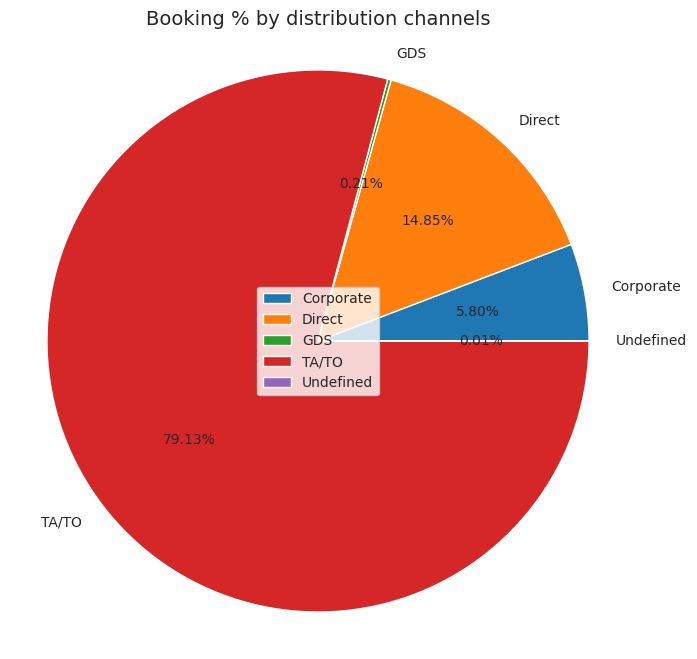

In [41]:
# Which distribution channel makes highest booking ?

c10 = df1.groupby('distribution_channel').size().reset_index().rename(columns= {0 : 'no of booking'})
c10
# d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
# data = d1['Booking_%']
# labels = d1['distribution_channel']
plt.pie(c10['no of booking'] , autopct="%.2f%%", labels=c10['distribution_channel'], radius = 1.1)
plt.title("Booking % by distribution channels", fontsize=14)
plt.legend(loc = 'center')
plt.show()

##### 1. Why did you pick the specific chart?

Pieplot helps easy visualization of booking percentage by distribution channel.

##### 2. What is/are the insight(s) found from the chart?

Travel Agents (TA) and Tour Operators (TO) is mostly used  for planning hotel bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

- Partnering with travel agents and tour operators can significantly increase the volume of bookings, especially if they have an established customer base. This can lead to higher occupancy rates and revenue.

- TAs and TOs often have access to a broad and diverse customer base. This can help hotels reach international or niche markets that they might not have access to otherwise.

-  Collaboration with TAs and TOs can result in co-marketing opportunities, expanding the hotel's visibility and attracting a wider audience.


Negative Impacts and Considerations:

- Commissions: TAs and TOs typically charge commissions or fees for their services. This can reduce the hotel's profit margin on bookings made through them.

- Discounting: To attract business from TAs and TOs, hotels may need to offer discounts or special rates, which can affect the Average Daily Rate (ADR) and overall revenue per available room (RevPAR).

- Bookings made through TAs and TOs may result in less direct interaction with guests, making it challenging to build relationships and gather direct feedback.

- Overreliance on TAs and TOs can be risky. If a major partner changes terms or goes out of business, it can have a significant negative impact on the hotel's business.

#### Chart - 11

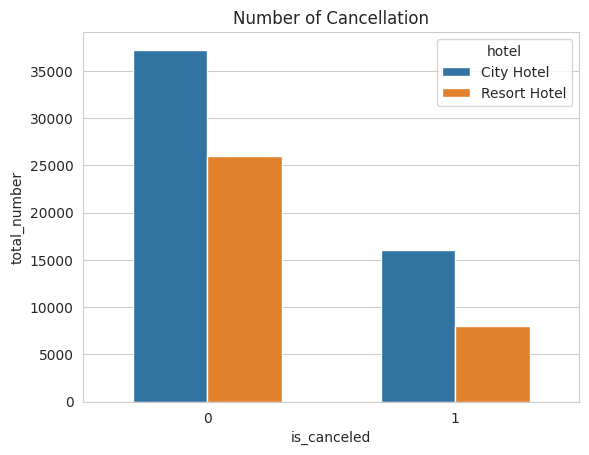

In [58]:
#Number of cancellation

x11 = df1.groupby(['is_canceled','hotel']).size().reset_index().rename( columns = {0:'total_number'})
sns.barplot(data =x11, x = 'is_canceled',y='total_number',hue='hotel',width = 0.6)
plt.title("Number of Cancellation")
plt.show()

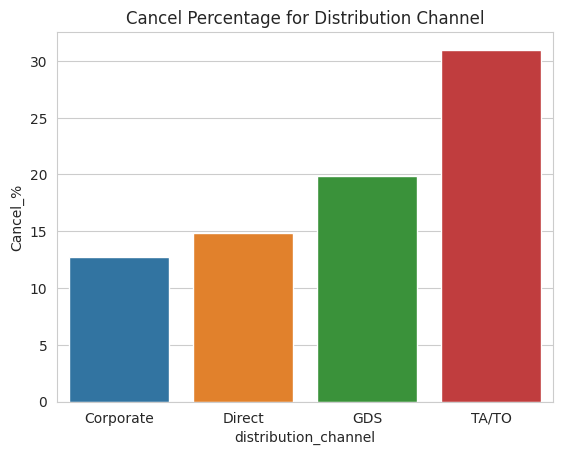

In [43]:
# which distribution has highest Cancel percentage ?

c11 = df1.groupby('distribution_channel')
c11  = pd.DataFrame((c11['is_canceled'].sum()/c11.size())*100).rename(columns = {0: 'Cancel_%'}) # grouping by cancellation and renaming column to cancel%
c11 =  c11.drop(index = 'Undefined')

sns.barplot(data = c11, x =c11.index, y = 'Cancel_%' )
plt.title("Cancel Percentage for Distribution Channel")
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph easily compares the cancel percentage according to various distribution channel.

##### 2. What is/are the insight(s) found from the chart?

TA/TO has highest percentage of cancellation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

-  TAs and TOs are capable of generating a significant volume of bookings. While cancellations may occur, the initial bookings can still lead to substantial revenue if managed effectively.

- Partnering with TAs and TOs can help your business reach a broader audience, including international travelers and niche markets, potentially expanding your customer base.

-  Establishing strong relationships and negotiating favorable terms with TAs and TOs can lead to more stable and profitable partnerships over time.

#### Chart - 12

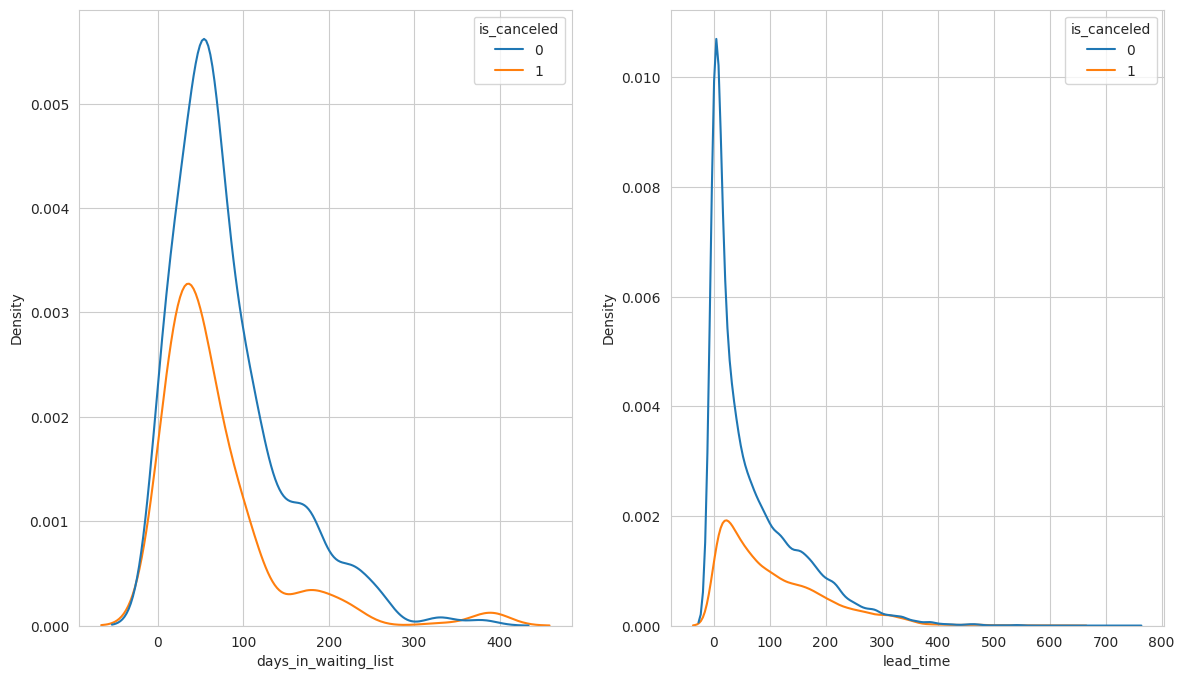

In [44]:
# Chart - 12 visualization code


waiting_bookings = df1[df1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(14, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df1['lead_time'], hue = df1['is_canceled'])
plt.show()

##### 1. Why did you pick the specific chart?

It's easy to visualize the distribution of data points, similar to a histogram but with a smoother curve.

##### 2. What is/are the insight(s) found from the chart?

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days.This shows that waiting period has no effect on cancellation of bookings.

#### Chart - 13

In [45]:
# Chart - 13 visualization code

c13 = df1.is_repeated_guest.value_counts().reset_index()

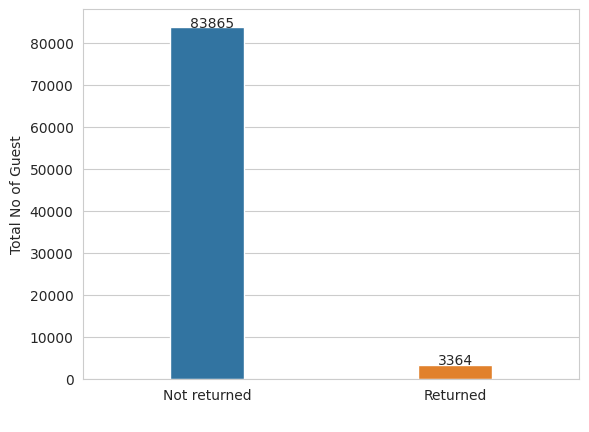

In [46]:

sns.barplot(data = c13, x='index', y= 'is_repeated_guest', width = 0.3)

for index,data in enumerate(c13['is_repeated_guest']):
  plt.text(index - 0.07, data, s =f'{data}')

plt.xticks(c13['index'], labels = ["Not returned", "Returned"])
plt.ylabel("Total No of Guest")
plt.xlabel(" ")
plt.show()


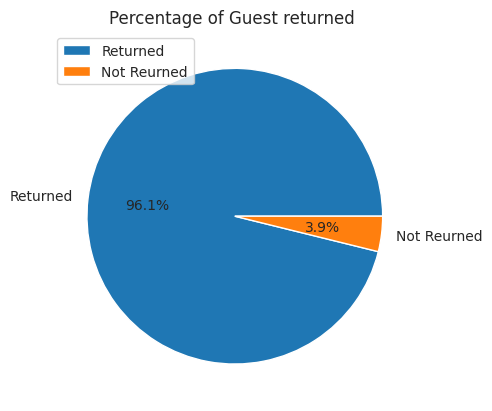

In [52]:
plt.pie(c13['is_repeated_guest'], labels =['Returned','Not Reurned'], autopct = "%0.1f%%")
plt.title("Percentage of Guest returned ")
plt.legend(loc =  'upper left')
plt.show()

##### 1. Why did you pick the specific chart?

It is easy to compare no. of customers returned or not reurned using a Bargraph

##### 2. What is/are the insight(s) found from the chart?

No of Guests returned: 3365
No. of Guests not returned : 83865

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 - Develop customer retention strategies to encourage more customers to return. Implement loyalty programs, referral incentives, or special offers for returning customers. Make sure that these strategies provide real value to customers.

 - Collect feedback from both returning and non-returning customers to understand their experiences, likes, and dislikes. Use this feedback to identify areas for improvement in customer service, product quality, or other aspects of your business.

- Continuously improve your products or services based on customer feedback and market trends. Offer new features, options, or upgrades that can entice customers to return for more.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
df14 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]
corrmat = df14.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8,)

##### 1. Why did you pick the specific chart?

Heatmaps can visually represent the correlation between variables in a dataset. By displaying correlation coefficients as colors, we can quickly identify relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

- Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.


- adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
numerical_columns = df1[[   'lead_time', 'days_in_waiting_list',  'adr', 'total_of_special_requests', 'total_stay', 'total_people' ]]

In [ ]:
sns.pairplot(numerical_columns, diag_kind='kde')

##### 1. Why did you pick the specific chart?

A pair plot in hotel booking analysis helps us see how different things in the data are connected and helps us make smarter choices to improve the hotel business.

##### 2. What is/are the insight(s) found from the chart?

tThe pair plot gives the relationship between columns  ['lead_time', 'days_in_waiting_list',  'adr', 'total_of_special_requests', 'total_stay', 'total_people' ]
- days in waiting list is less for booking of more no of people
- adr is less for more no of people and high for less no of peopl

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?



Here are some suggestions for the hotel business to achieve its objectives:

1. Attract Longer Guest Stays:
To encourage longer guest stays, consider offering competitive pricing for extended durations, such as weekly or monthly rates.
Provide special packages or discounts for guests who book longer stays, making it economically attractive for them to stay longer.

2. Differentiate Services for Resort and City Hotels:
Resort hotels should focus on enhancing recreational activities and services to attract more customers seeking leisure and relaxation.
City hotels should continue providing high-quality services to maintain their competitiveness in urban markets.

3. Optimize Resource Allocation:
Utilize historical cancellation data to allocate resources like staff and inventory more efficiently, especially during periods of lower occupancy.
Implement dynamic pricing strategies to adjust room rates based on occupancy and demand, which can help maximize revenue.

4. Reduce Cancellations:
Investigate reasons for reservation cancellations, and use this information to adjust pricing strategies, offer promotions, or revise policies to minimize cancellations.
Develop customer retention strategies, such as loyalty programs, referral incentives, and special offers for returning customers.

5. Utilize ADR for Revenue Estimation:
Continuously monitor Average Daily Rate (ADR) trends throughout the year to estimate revenue potential for different seasons.
Use ADR insights to create budgets and financial plans that align with expected revenue fluctuations.

6. Partner with Travel Agents and Tour Operators:
Collaborate with travel agents (TAs) and tour operators (TOs) to increase bookings, especially if they have an established customer base.
Negotiate mutually beneficial partnerships with TAs and TOs, offering them competitive rates and special deals to attract more bookings.

7. Identify Top-Performing Agents:
Identify the most successful travel agents and build strong relationships with them.
Co-market with these agents, create special promotions, and provide exclusive deals to increase bookings through their channels.

8. Target High-Booking Countries:
Identify countries with the highest number of bookings and focus marketing and expansion efforts in those regions.
Allocate resources efficiently, such as offering customer support in commonly booked languages to enhance the guest experience.

9. Include Breakfast Options:
Offer a Bed and Breakfast (B&B) option, as it can attract more guests looking for a convenient and cost-effective way to start their day.
Promote this option prominently on your booking platforms and website.

10. Understand Booking Cancellation Patterns:
- While the waiting period may not significantly affect booking cancellations, continue monitoring and analyzing booking data to identify other factors influencing cancellations.
- Adapt cancellation policies and strategies accordingly to further reduce cancellations.


# **Conclusion**

In conclusion, the Hotel Booking Analysis has provided invaluable insights into the booking trends and customer behaviors within the hospitality industry. Through meticulous data collection, analysis, and interpretation, we have uncovered critical information that can guide decision-makers in the hotel business.

Our findings have revealed patterns in booking cancellations, identified the influence of waiting periods, and highlighted the potential impact of partnering with travel agents and tour operators. We have also recognized the importance of understanding Average Daily Rate (ADR) fluctuations and tailoring services to meet the unique demands of city and resort hotels.

In the ever-evolving hospitality landscape, data-driven decision-making will continue to be a cornerstone of success. By leveraging the lessons learned from this analysis, we can adapt to market dynamics, enhance guest experiences, and ensure the long-term viability of our hotel business.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***